1.a.

    1 protein = 300 amino acids
    1 amino acid = 3 base pairs
    
    E. coli:
    5*10^6 base pairs / 900 = 5000 genes
    
    Drosophila:
    100*10^6 / 900 = 100,000 genes
    
    The estimate for E. coli is right on, but the estimate for Drosophila is much too high. 
    
1.b.

    From looking at Fig. 1 a typical transcript is about 20% exons and 80% introns. 
    
1.c.

    Length of prespliced mRNA transcript:
    758 aa * 5 = 4000 aa
    * 3 bp / 1 aa = 12000 bp
    
    Minimum transcription rate:
    12000 nt / 4 min = 3000 nt/min
    * 1 min / 60 s = 50 nt/s


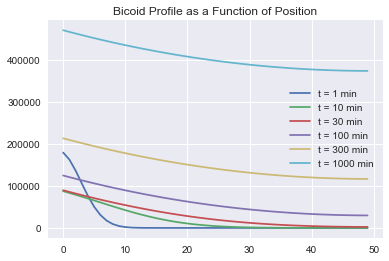

In [25]:
%matplotlib inline

# 2.a.

# Imports
import numpy
import matplotlib.pyplot as plt
import seaborn

def master_equation(cnc, k, dt):
    """
    Computes the master equation for diffusion in one dimension.
    
    Parameters
    ----------
    cnc : 2d-array
        Array in which concentrations will be stored. This should be in
        the shape of N boxes by m time points. This should have a preset initial
        condition. 
    k : float
        Jump rate of particles between boxes in units of 1/s. 
    dt : float
        Time step for our integration. This should be in units of seconds and
        should be sufficiently smaller than our jump rate for numerical stability.
        
    Returns
    -------
    cnc: 2d-array
        The concentration vector given to the function where each element now
        contains a computed probability.
    """
    # Production rate and degradation rate
    p_rate = 20000
    d_rate = 3000
    
    # Find number of boxes and time points
    num_b, num_t = numpy.shape(cnc)
    
    # Loop to integrate over time range
    for t in range(1, num_t): 
        # Deal with boundary conditions
        cnc[0, t] = cnc[0, t-1] + k * dt * cnc[1, t-1] - k * dt * cnc[0, t-1] + dt * p_rate - dt * cnc[0, t-1] / d_rate
        cnc[num_b-1, t] = cnc[num_b-1, t-1] + k * dt * cnc[num_b-2, t-1] - k * dt * cnc[num_b-1, t-1] - dt * cnc[num_b-1, t-1] / d_rate
                
        # Loop over all other boxes
        for box in range(1, num_b - 1):
            cnc[box, t] = cnc[box, t-1] + k * dt * cnc[box-1, t-1] + k * dt * cnc[box+1, t-1] - 2 * k * dt * cnc[box, t-1] - dt * cnc[box, t-1] / d_rate
                
    return cnc

# Define parameters. 
k = 5
dt = .02
num_boxes = 50
time_steps = 60001

# Set up concentration array
cnc_1 = numpy.zeros((num_boxes, time_steps))

# Set initial condition
cnc_1[0, 0] = 750000

# Run program
cnc_1 = master_equation(cnc_1, k, dt)

# Set timepoints
time_points = [60, 600, 1800, 6000, 18000, 60000]

# Plot stuff
plt.plot(cnc_1[:, time_points[0]], label = 't = 1 min')
plt.plot(cnc_1[:, time_points[1]], label = 't = 10 min')
plt.plot(cnc_1[:, time_points[2]], label = 't = 30 min')
plt.plot(cnc_1[:, time_points[3]], label = 't = 100 min')
plt.plot(cnc_1[:, time_points[4]], label = 't = 300 min')
plt.plot(cnc_1[:, time_points[5]], label = 't = 1000 min')
plt.title('Bicoid Profile as a Function of Position')
plt.legend()



2.a.

   The profile has not fully reached a steady state but is coming close to one at 1000 min in.
   
2.b.
    
    0 = D(d^2c/dx^2) - (c/τ)
    c = Ae^(σx)
    d^2c/dx^2 = σ^2 * Ae^(σx)
    0 = Dσ^2 * Ae^(σx) - (Ae^(σx))/τ
    0 = Dσ^2 - 1/τ
    1/Dτ = σ^2
    σ = -(1/Dτ)^(1/2), (1/Dτ)^(1/2)
    boundary conditions =>
    σ = -(1/Dτ)^(1/2)
    
    c(x) = Ae^(-((1/Dτ)^(1/2))*x)
    
    A = c(0)
    
2.c.

    c(x_cf)*G = c^*
    c^* = Ae^(-((1/Dτ)^(1/2))*x_wild)
    GAe^(-((1/Dτ)^(1/2))*x_cf) = Ae^(-((1/Dτ)^(1/2))*x_wild)
    ln(G) - ((1/Dτ)^(1/2))*x_cf = -((1/Dτ)^(1/2))*x_wild
    x_cf = x_wild + ln(G)*(Dτ)^(1/2)
    

Using matplotlib backend: MacOSX
0.239546786654


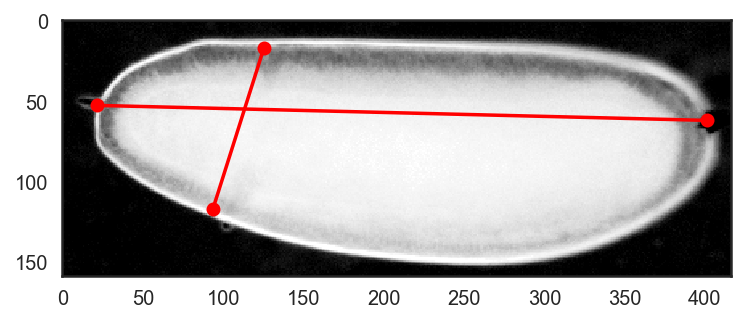

In [26]:
%matplotlib

# 3.a.

# Imports
import skimage.io

# Read the images
im1 = skimage.io.imread('0.5xBcd.tif')
im2 = skimage.io.imread('1xBcd.tif')
im3 = skimage.io.imread('2xBcd.tif')

# Removes the default white grid
with seaborn.axes_style("white"):
    plt.imshow(im1)

# Record 2 clicks and plot line connecting clicks
clicks_1 = plt.ginput(2)
with seaborn.axes_style("white"):
    plt.plot((clicks_1[0][0], clicks_1[1][0]), (clicks_1[0][1], clicks_1[1][1]), color='r', marker='o')

# Record 2 more clicks and plot line
clicks_2 = plt.ginput(2)
with seaborn.axes_style("white"):
    plt.plot((clicks_2[0][0], clicks_2[1][0]), (clicks_2[0][1], clicks_2[1][1]), color='r', marker='o')

# Get furrow click
furr_click = plt.ginput(1)

# Find distances between clicks
ant_post = numpy.sqrt((clicks_1[1][1] - clicks_1[0][1])**2 + (clicks_1[1][0] - clicks_1[0][0])**2)
ant_furr = numpy.sqrt((furr_click[0][1] - clicks_1[0][1])**2 + (furr_click[0][0] - clicks_1[0][0])**2)

# Fractional position along embryo is their ratio
rel_furrow_pos1 = ant_furr / ant_post

# Print
print(rel_furrow_pos1)

0.299337913866


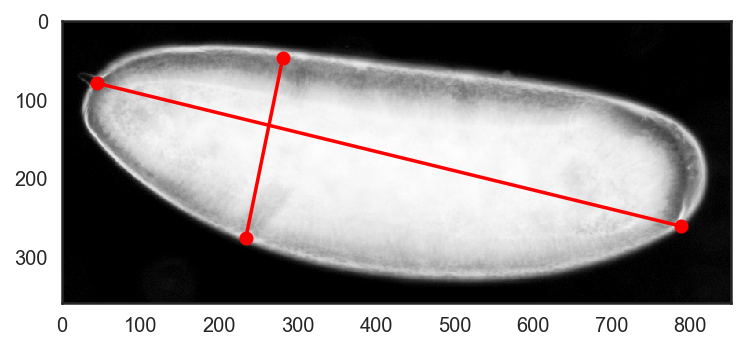

In [27]:
# Repeat for image 2
with seaborn.axes_style("white"):
    plt.imshow(im2)
clicks_1 = plt.ginput(2)
with seaborn.axes_style("white"):
    plt.plot((clicks_1[0][0], clicks_1[1][0]), (clicks_1[0][1], clicks_1[1][1]), color='r', marker='o')
clicks_2 = plt.ginput(2)
with seaborn.axes_style("white"):
    plt.plot((clicks_2[0][0], clicks_2[1][0]), (clicks_2[0][1], clicks_2[1][1]), color='r', marker='o')
furr_click = plt.ginput(1)
ant_post = numpy.sqrt((clicks_1[1][1] - clicks_1[0][1])**2 + (clicks_1[1][0] - clicks_1[0][0])**2)
ant_furr = numpy.sqrt((furr_click[0][1] - clicks_1[0][1])**2 + (furr_click[0][0] - clicks_1[0][0])**2)
rel_furrow_pos2 = ant_furr / ant_post
print(rel_furrow_pos2)

0.361349964415


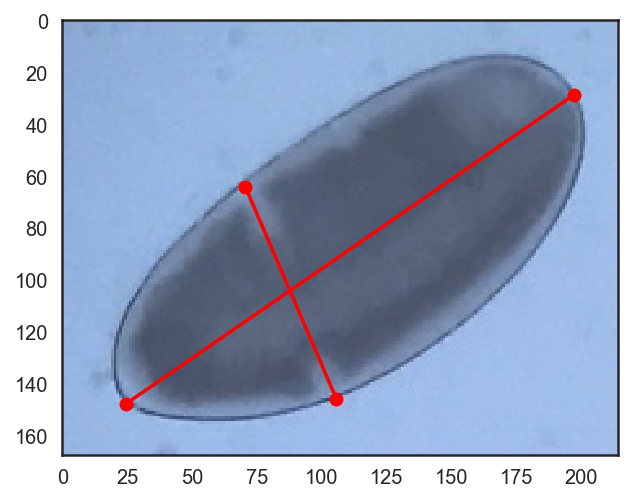

In [28]:
# Repeat for image 3
with seaborn.axes_style("white"):
    plt.imshow(im3)
clicks_1 = plt.ginput(2)
with seaborn.axes_style("white"):
    plt.plot((clicks_1[0][0], clicks_1[1][0]), (clicks_1[0][1], clicks_1[1][1]), color='r', marker='o')
clicks_2 = plt.ginput(2)
with seaborn.axes_style("white"):
    plt.plot((clicks_2[0][0], clicks_2[1][0]), (clicks_2[0][1], clicks_2[1][1]), color='r', marker='o')
furr_click = plt.ginput(1)
ant_post = numpy.sqrt((clicks_1[1][1] - clicks_1[0][1])**2 + (clicks_1[1][0] - clicks_1[0][0])**2)
ant_furr = numpy.sqrt((furr_click[0][1] - clicks_1[0][1])**2 + (furr_click[0][0] - clicks_1[0][0])**2)
rel_furrow_pos3 = ant_furr / ant_post
print(rel_furrow_pos3)

3.a.
    
    0.5xBcd.tif : 0.239546786654
    1xBcd.tif : 0.299337913866
    2xBcd.tif : 0.361349964415

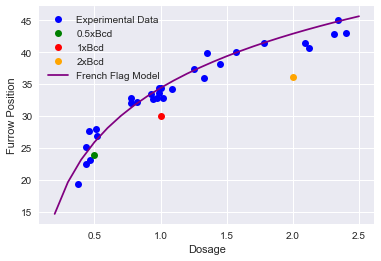

In [36]:
%matplotlib inline

# 3.b.

# Imports
import pandas

# Load data
data = pandas.read_csv('gregor_data.csv', comment='#')
dosage = data['dosage_G']
furrow = data['furrow_pos']


# Prediction curve from French Flag model
x_cf = numpy.zeros(24)
x_wild = 34.4
D = .5
tau = 300
G = numpy.linspace(0.2, 2.5, 24)

for i in range(24):
    x_cf[i] = x_wild + numpy.log(G[i])*(D*tau)**(1/2)

# Plot stuff
plt.plot(dosage, furrow, 'o', label='Experimental Data', color='blue')
plt.plot(.5, rel_furrow_pos1*100, 'o', label='0.5xBcd', color='green')
plt.plot(1, rel_furrow_pos2*100, 'o', label='1xBcd', color='red')
plt.plot(2, rel_furrow_pos3*100, 'o', label='2xBcd', color='orange')
plt.plot(G, x_cf, label='French Flag Model', color='purple')
plt.xlabel('Dosage')
plt.ylabel('Furrow Position')
plt.legend()

3.c.

    The experimental data seems to fit very well with the predictions we made in problem 2. 
